## INTRODUCTION
Transportasi kereta api, khususnya layanan KRL Commuter Line, merupakan bagian vital dari mobilitas perkotaan di Jakarta dan sekitarnya. Mengingat tingginya volume penumpang dan kompleksitas operasional, analisis data perjalanan menjadi penting untuk meningkatkan efisiensi dan kenyamanan layanan. Analisis ini bertujuan untuk memahami pola perjalanan, frekuensi keberangkatan, dan distribusi waktu perjalanan berdasarkan data tujuan, lintasan, dan waktu keberangkatan kereta.
Analisis meliputi eksplorasi data awal, penanganan nilai yang hilang, serta analisis frekuensi dan persentase tujuan perjalanan. Selain itu, distribusi waktu keberangkatan untuk setiap lintas dianalisis, menghitung rata-rata jeda waktu antar keberangkatan, dan melakukan uji hipotesis untuk mengetahui perbedaan signifikan dalam waktu keberangkatan antara dua lintas utama. Visualisasi data dengan pie chart, bar chart, dan line chart digunakan untuk memudahkan pemahaman hasil analisis. 
Hasil analisis ini diharapkan dapat memberikan wawasan yang bermanfaat bita bagi penumpang untuk merencanakan perjalanan mereka dengan lebih baiki.asi.

In [125]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


## Import Library

mengimpor library pandas untuk manipulasi dan analisis data, matplotlib.pyplot untuk visualisasi data, dan seaborn untuk visualisasi data statistik.

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import folium
from folium import plugins

## Import DataSet

membaca file CSV bernama 'commuterline.csv' dan menyimpannya ke dalam DataFrame Pandas dengan nama 'data'.

In [127]:
data = pd.read_csv('commuterline.csv')

In [128]:
data.head()

,Tujuan,Lintas,Keberangkatan
0,DURI,COMMUTER LINE BST,5:00
1,JAKARTAKOTA,COMMUTER LINE BOGOR,5:02
2,ANGKE,COMMUTER LINE CIKARANG,5:06
3,CIKARANG,COMMUTER LINE CIKARANG,5:12
4,KAMPUNGBANDAN,COMMUTER LINE CIKARANG,5:12


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tujuan         507 non-null    object
 1   Lintas         507 non-null    object
 2   Keberangkatan  507 non-null    object
dtypes: object(3)
memory usage: 12.0+ KB


In [130]:
data.describe()

,Tujuan,Lintas,Keberangkatan
count,507,507,507
unique,11,5,416
top,BOGOR,COMMUTER LINE BOGOR,8:18
freq,131,273,3


## Check Missing Value

menghitung jumlah nilai yang hilang (missing value) untuk setiap kolom dalam DataFrame 'data' dan menampilkan hasilnya.

In [131]:
#missing value
data.isna().sum()

Tujuan           0
Lintas           0
Keberangkatan    0
dtype: int64

## Pola Perjalanan

menghitung frekuensi setiap tujuan perjalanan dengan mengelompokkan data berdasarkan kolom 'Tujuan' dan menghitung jumlah baris untuk setiap kelompok. Hasilnya disimpan dalam variabel 'tujuan_frek'.

In [132]:
# Analisis Pola Perjalanan
tujuan_frek = data.groupby('Tujuan').size()
print("\nPola Perjalanan berdasarkan Tujuan:")
print(tujuan_frek)


Pola Perjalanan berdasarkan Tujuan:
Tujuan
ANGKE             43
BEKASI            45
BOGOR            131
CIKARANG          45
DEPOK             10
DURI              28
JAKARTAKOTA      122
KAMPUNGBANDAN     69
NAMBO             10
TAMBUN             2
TANAH ABANG        2
dtype: int64


## Persentase Tujuan

menghitung jumlah setiap tujuan perjalanan dengan menggunakan value_counts() pada kolom 'Tujuan'. Hasilnya disimpan dalam variabel 'tujuan_counts'.
Baris kedua menghitung persentase setiap tujuan perjalanan dengan menggunakan value_counts(normalize=True) pada kolom 'Tujuan', yang memberikan proporsi setiap nilai. Hasilnya dikalikan dengan 100 untuk mendapatkan persentase dan disimpan dalam variabel 'tujuan_percentages'.

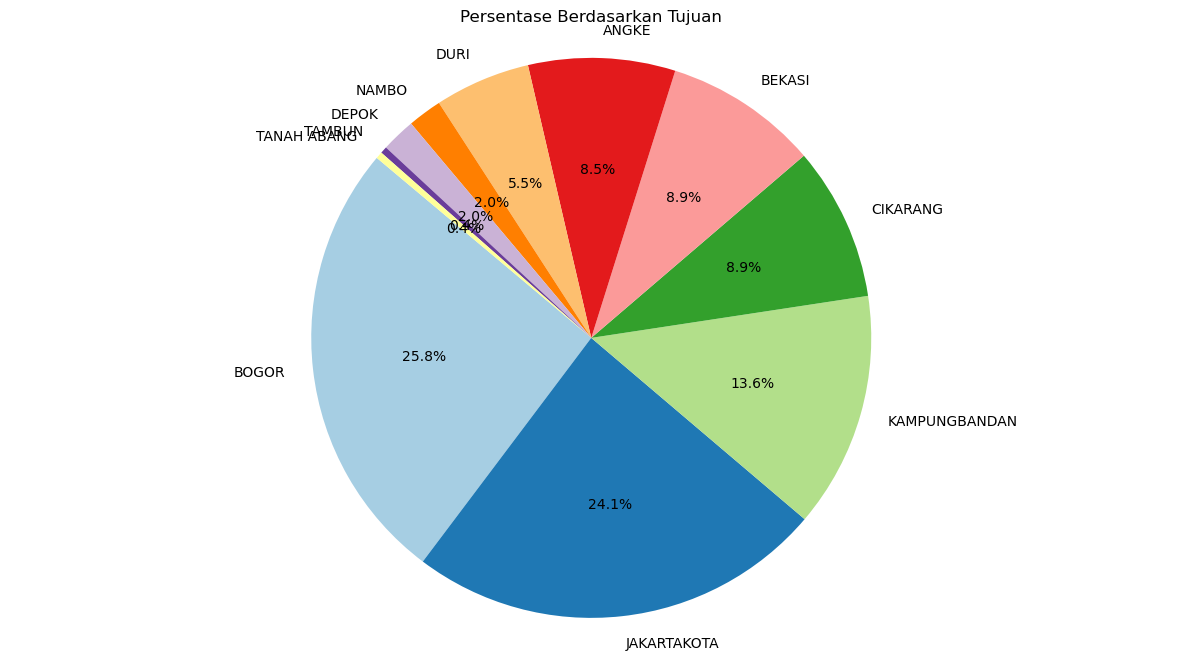

Tujuan
BOGOR            25.838264
JAKARTAKOTA      24.063116
KAMPUNGBANDAN    13.609467
CIKARANG          8.875740
BEKASI            8.875740
ANGKE             8.481262
DURI              5.522682
NAMBO             1.972387
DEPOK             1.972387
TAMBUN            0.394477
TANAH ABANG       0.394477
Name: proportion, dtype: float64


In [133]:
# Menghitung jumlah dan persentase tujuan
tujuan_counts = data['Tujuan'].value_counts()
tujuan_percentages = data['Tujuan'].value_counts(normalize=True) * 100

# Membuat pie chart
plt.figure(figsize=(15, 8))
plt.pie(tujuan_percentages, labels=tujuan_percentages.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Persentase Berdasarkan Tujuan')
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()

# Menampilkan DataFrame untuk verifikasi
print(tujuan_percentages)

## Persentase Lintas

serupa dengan code sebelumnya, tetapi menggunakan kolom 'Lintas' sebagai data untuk membuat pie chart persentase lintas kereta.

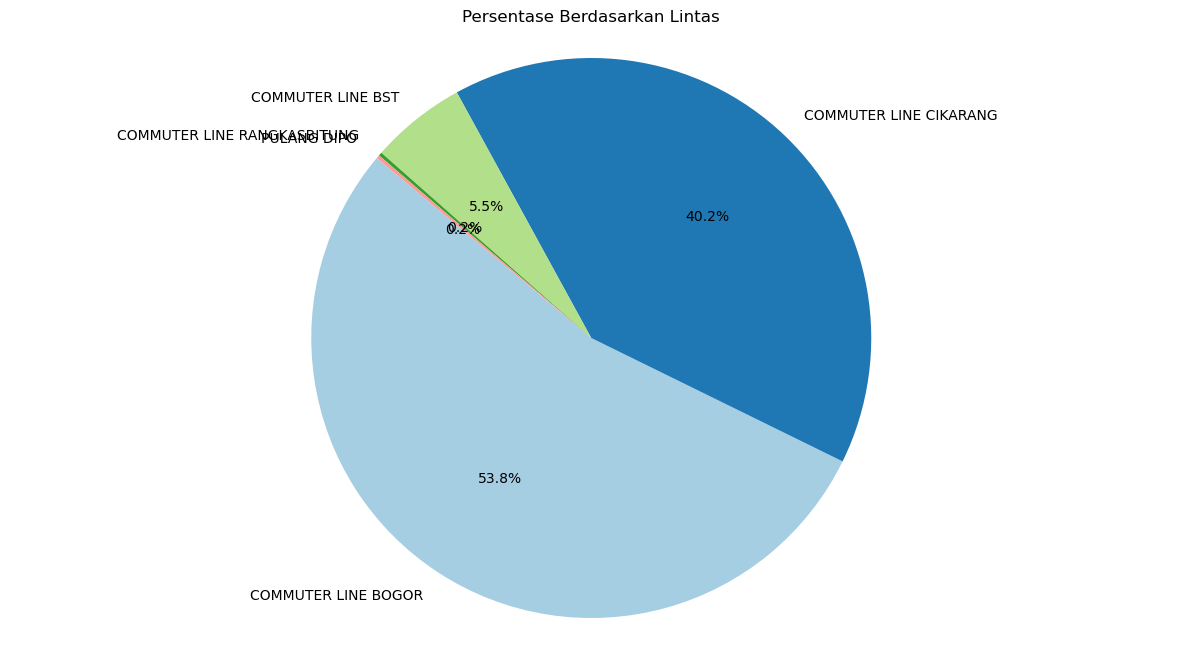

Tujuan
BOGOR            25.838264
JAKARTAKOTA      24.063116
KAMPUNGBANDAN    13.609467
CIKARANG          8.875740
BEKASI            8.875740
ANGKE             8.481262
DURI              5.522682
NAMBO             1.972387
DEPOK             1.972387
TAMBUN            0.394477
TANAH ABANG       0.394477
Name: proportion, dtype: float64


In [134]:
# Menghitung jumlah dan persentase tujuan
lintas_counts = data['Lintas'].value_counts()
lintas_percentages = data['Lintas'].value_counts(normalize=True) * 100

# Membuat pie chart
plt.figure(figsize=(15, 8))
plt.pie(lintas_percentages, labels=lintas_percentages.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Persentase Berdasarkan Lintas')
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()

# Menampilkan DataFrame untuk verifikasi
print(tujuan_percentages)

## Frekuensi Tujuan

membuat bar chart menggunakan sns.barplot() dari library seaborn. Argumen x=tujuan_frek.index menggunakan indeks (tujuan) sebagai label sumbu x, dan y=tujuan_frek.values menggunakan nilai frekuensi sebagai tinggi batang.

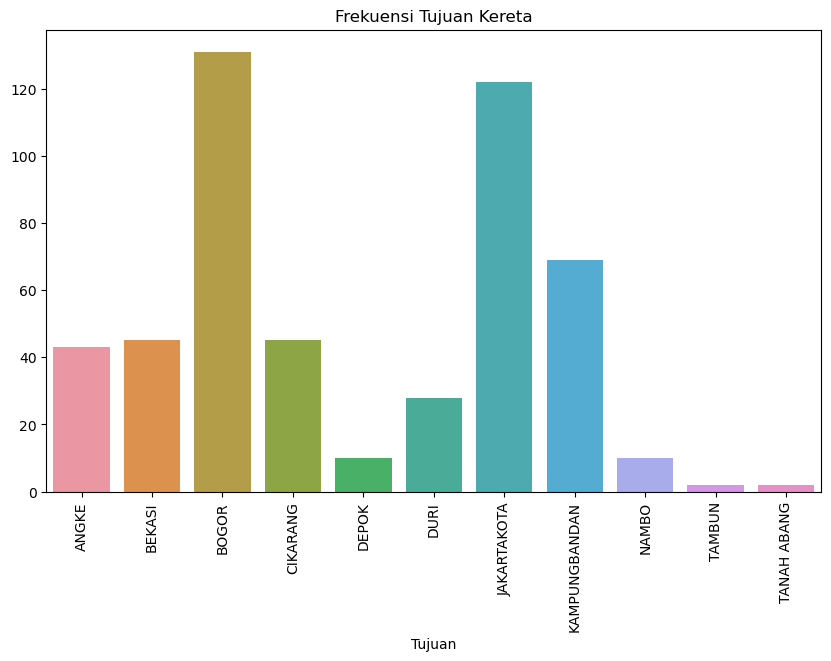

In [135]:
# Analisis Pola Perjalanan

plt.figure(figsize=(10, 6))
sns.barplot(x=tujuan_frek.index, y=tujuan_frek.values)
plt.title('Frekuensi Tujuan Kereta')
plt.xticks(rotation=90)
plt.show()

## Frekuensi Lintas

serupa dengan sebelumnya, tetapi menggunakan kolom 'Lintas' sebagai data untuk membuat bar chart frekuensi lintas kereta.

Lintas
COMMUTER LINE BOGOR            273
COMMUTER LINE CIKARANG         204
COMMUTER LINE BST               28
COMMUTER LINE RANGKASBITUNG      1
PULANG DIPO                      1
Name: count, dtype: int64


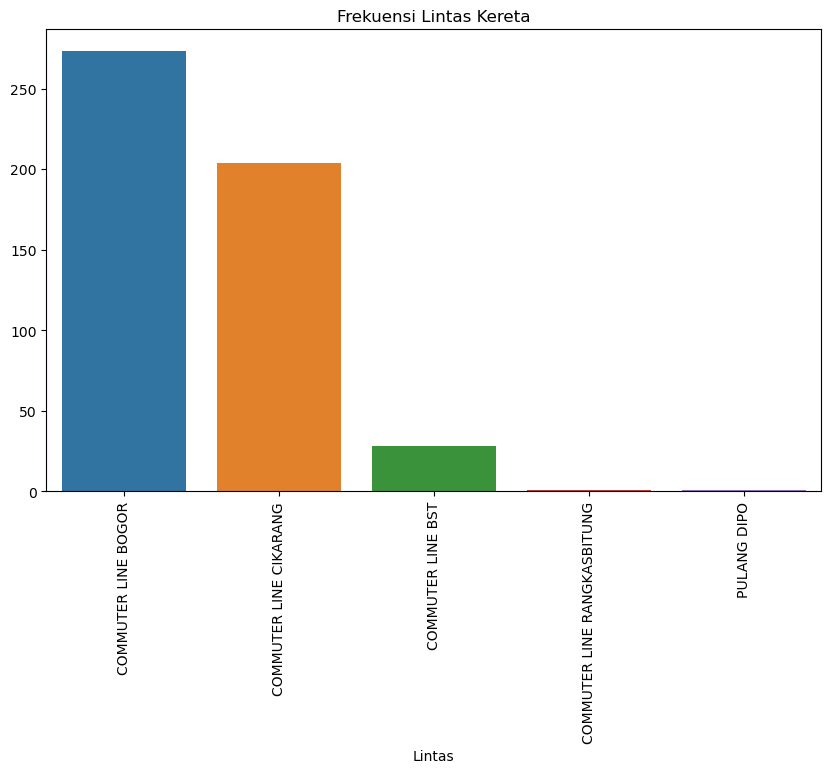

In [136]:
# Frekuensi Lintas
lintas_frek = data['Lintas'].value_counts()
print(lintas_frek)
plt.figure(figsize=(10, 6))
sns.barplot(x=lintas_frek.index, y=lintas_frek.values)
plt.title('Frekuensi Lintas Kereta')
plt.xticks(rotation=90)
plt.show()

## Keberangkatan Pertama dan Terakhir

mengonversi kolom 'Keberangkatan' menjadi objek datetime, kemudian
menemukan waktu keberangkatan paling awal dan paling akhir dengan menggunakan fungsi min() dan max() pada kolom 'Keberangkatan'.

In [137]:
# Analisis Waktu Keberangkatan
data['Keberangkatan'] = pd.to_datetime(data['Keberangkatan'])

# Temukan keberangkatan paling pagi
keberangkatan_paling_pagi = data['Keberangkatan'].min()
keberangkatan_paling_akhir = data['Keberangkatan'].max()
print("Keberangkatan Pertama:", keberangkatan_paling_pagi)
print("Waktu Keberangkatan Terakhir:", keberangkatan_paling_akhir)

Keberangkatan Pertama: 2024-05-17 05:00:00
Waktu Keberangkatan Terakhir: 2024-05-17 22:49:00


C:\Users\Satya\AppData\Local\Temp\ipykernel_6020\3632462988.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Keberangkatan'] = pd.to_datetime(data['Keberangkatan'])


## Frekuensi Keberangkatan

Menghitung frekuensi keberangkatan berdasarkan jam dengan mengelompokkan data berdasarkan jam dari kolom 'Keberangkatan' dan menghitung jumlah baris untuk setiap kelompok jam. Hasilnya disimpan dalam variabel 'frekuensi_jam'.

In [138]:
data['Keberangkatan'] = pd.to_datetime(data['Keberangkatan'])
frekuensi_jam = data.groupby(data['Keberangkatan'].dt.hour)['Keberangkatan'].count()

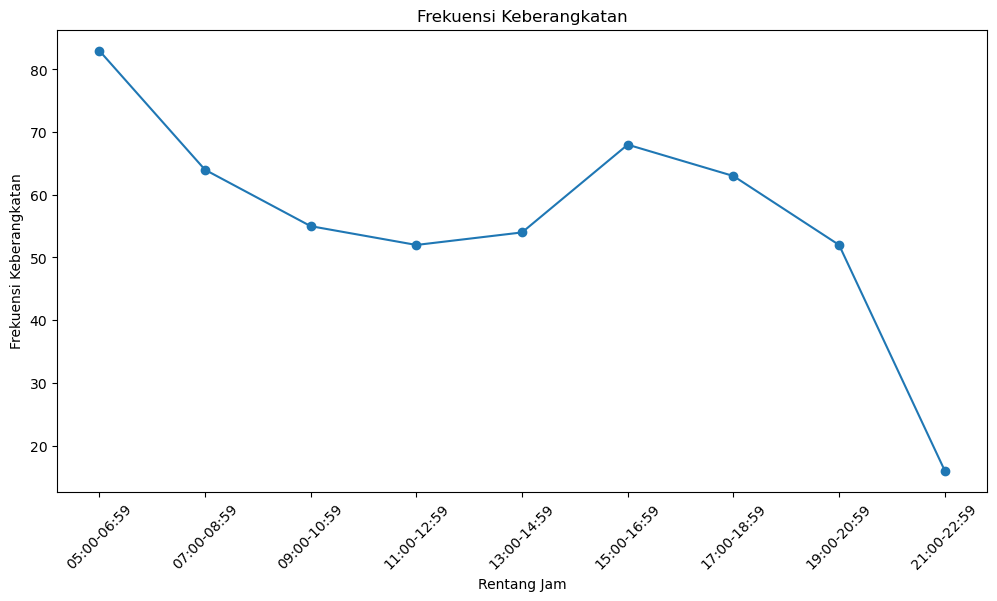

In [139]:
# Plot frekuensi keberangkatan per jam
plt.figure(figsize=(12, 6))
frekuensi_rentang_jam.plot(kind='line', marker='o')
plt.xlabel('Rentang Jam')
plt.ylabel('Frekuensi Keberangkatan')
plt.title('Frekuensi Keberangkatan')
plt.xticks(rotation=45)
plt.show()

## Jumlah Keberangkatan Setiap Lintas

Data dikelompokkan berdasarkan kolom 'Lintas' dan jam dari kolom 'Keberangkatan', lalu dihitung jumlah baris untuk setiap kelompok. Hasilnya di-unstack menjadi DataFrame dengan kolom untuk setiap lintas dan baris untuk setiap jam. Nilai yang hilang diisi dengan 0 menggunakan fillna(0).

Lintas         COMMUTER LINE BOGOR  COMMUTER LINE BST  COMMUTER LINE CIKARANG  \
Keberangkatan                                                                   
5                              7.0                2.0                    12.0   
6                             13.0                2.0                    14.0   
7                             19.0                1.0                    13.0   
8                             16.0                2.0                    13.0   
9                             20.0                1.0                    12.0   
10                            16.0                2.0                    12.0   
11                            13.0                2.0                    10.0   
12                            15.0                1.0                    11.0   
13                            13.0                2.0                    10.0   
14                            13.0                1.0                     9.0   
15                          

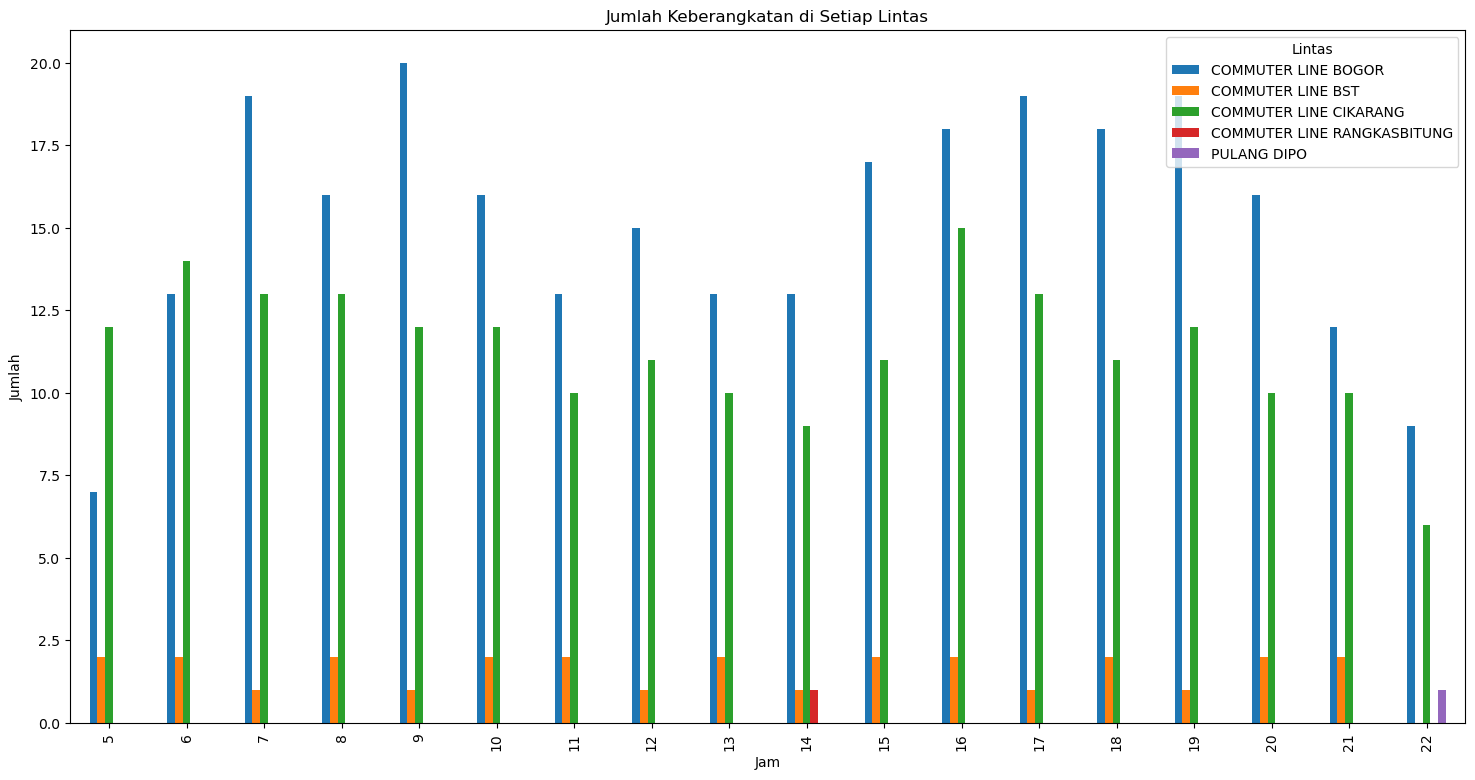

In [140]:
rata_rata_keberangkatan = data.groupby('Lintas')['Keberangkatan'].mean().reset_index()

# Menyiapkan data untuk scatter plot
rata_rata_keberangkatan = data.groupby(['Lintas', data['Keberangkatan'].dt.hour])['Keberangkatan'].count().unstack('Lintas').fillna(0)

print(rata_rata_keberangkatan)

# Membuat hourly pattern bar chart
fig, ax = plt.subplots(figsize=(18, 9))
rata_rata_keberangkatan.plot(kind='bar', ax=ax)
ax.set_xlabel('Jam')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Keberangkatan di Setiap Lintas')
ax.legend(rata_rata_keberangkatan.columns, title='Lintas', loc='upper right')

## Rata-rata Headway Seiap Lintas

Pertama menghitung selisih waktu antar keberangkatan (headway) untuk setiap tujuan dengan menggunakan metode diff() pada kolom 'Keberangkatan' yang dikelompokkan berdasarkan kolom 'Tujuan'. Hasilnya disimpan dalam kolom baru 'Time_Diff'.
Kemudian menghitung rata-rata headway untuk setiap tujuan dengan menggunakan mean() pada kolom 'Time_Diff' yang dikelompokkan berdasarkan kolom 'Tujuan'.
Lalu mengonversi objek TimedeltaIndex menjadi string dan mengambil bagian terakhir (misalnya, '00:10:00' menjadi '00').

In [141]:
# Menghitung selisih waktu antar keberangkatan untuk setiap tujuan
data['Time_Diff'] = data.groupby('Tujuan')['Keberangkatan'].diff()
# Menghitung rata-rata waktu jeda keberangkatan untuk setiap tujuan
average_time_diff = data.groupby('Tujuan')['Time_Diff'].mean()
average_time_diff_str = average_time_diff.astype(str).str.split().str[-1]

print(average_time_diff_str)

Tujuan
ANGKE            00:24:34.285714285
BEKASI           00:23:28.636363636
BOGOR            00:07:45.692307692
CIKARANG         00:23:32.727272727
DEPOK            01:27:46.666666666
DURI                       00:36:40
JAKARTAKOTA      00:08:45.619834710
KAMPUNGBANDAN              00:15:15
NAMBO            01:39:46.666666666
TAMBUN                     06:04:00
TANAH ABANG                08:09:00
Name: Time_Diff, dtype: object


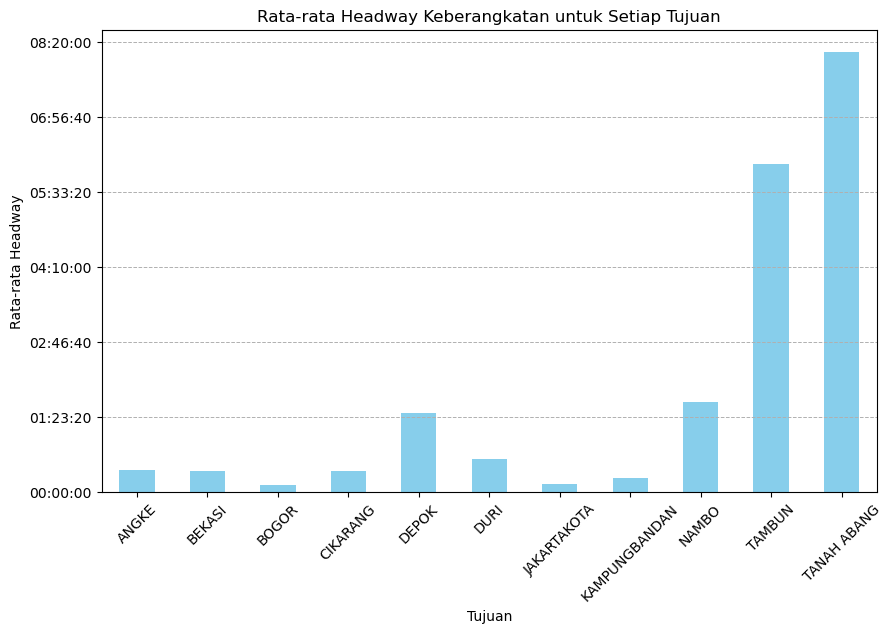

In [142]:
# Membuat bar plot
average_time_diff_seconds = average_time_diff.dt.total_seconds()

plt.figure(figsize=(10, 6))
average_time_diff_seconds.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Headway Keberangkatan untuk Setiap Tujuan')
plt.xlabel('Tujuan')
plt.ylabel('Rata-rata Headway')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Menyesuaikan label sumbu y ke format jam:menit:detik
def format_time(x, pos):
    hours, remainder = divmod(x, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{int(hours):02}:{int(minutes):02}:{int(seconds):02}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_time))

# Menampilkan plot
plt.show()

## A/B TEST

Kolom 'Keberangkatan' dikonversi menjadi tipe data datetime. Kemudian, data dibagi menjadi dua kelompok berdasarkan lintas ('COMMUTER LINE BOGOR' dan 'COMMUTER LINE CIKARANG'). Waktu keberangkatan diubah menjadi jumlah detik sejak awal hari untuk setiap keberangkatan dalam kedua kelompok. Setelah itu, dilakukan uji t dua sampel independen untuk menentukan apakah ada perbedaan signifikan dalam rata-rata waktu keberangkatan antara kedua lintas. Hasil dari uji t ini dinyatakan dalam bentuk nilai t-statistik dan p-value. Jika p-value lebih kecil dari tingkat signifikansi yang ditetapkan (alpha = 0.05), maka hipotesis nol ditolak, yang berarti ada perbedaan signifikan antara kedua lintas; sebaliknya, jika p-value lebih besar dari alpha, hipotesis nol tidak dapat ditolak.

T-statistic: 1.1177253874185349
P-value: 0.26424929068113073
Hasil: Gagal Tolak Hipotesis Nol (Tidak ada perbedaan signifikan)


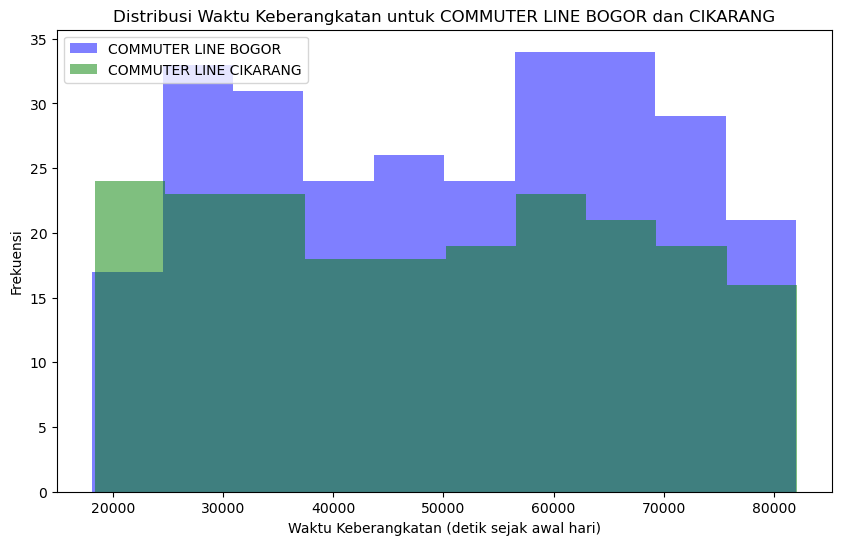

In [143]:
# Mengonversi kolom keberangkatan menjadi datetime
from scipy import stats

# Mengonversi kolom keberangkatan menjadi datetime
data['Keberangkatan'] = pd.to_datetime(data['Keberangkatan'])

# Memisahkan data berdasarkan lintas
group_bogor = data[data['Lintas'] == 'COMMUTER LINE BOGOR']['Keberangkatan']
group_cikarang = data[data['Lintas'] == 'COMMUTER LINE CIKARANG']['Keberangkatan']

# Menghitung waktu dalam detik sejak awal hari untuk setiap keberangkatan
group_bogor_seconds = group_bogor.dt.hour * 3600 + group_bogor.dt.minute * 60 + group_bogor.dt.second
group_cikarang_seconds = group_cikarang.dt.hour * 3600 + group_cikarang.dt.minute * 60 + group_cikarang.dt.second

# Melakukan uji t dua sampel (independen)
t_stat, p_value = stats.ttest_ind(group_bogor_seconds, group_cikarang_seconds)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Menentukan hasil berdasarkan p-value
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print("Hasil: Tolak Hipotesis Nol (Ada perbedaan signifikan)")
else:
    print("Hasil: Gagal Tolak Hipotesis Nol (Tidak ada perbedaan signifikan)")

# Visualisasi distribusi keberangkatan untuk kedua lintas
plt.figure(figsize=(10, 6))
plt.hist(group_bogor_seconds, bins=10, alpha=0.5, label='COMMUTER LINE BOGOR', color='blue')
plt.hist(group_cikarang_seconds, bins=10, alpha=0.5, label='COMMUTER LINE CIKARANG', color='green')
plt.xlabel('Waktu Keberangkatan (detik sejak awal hari)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Waktu Keberangkatan untuk COMMUTER LINE BOGOR dan CIKARANG')
plt.legend()
plt.show()